In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import sys
sys.path.append('/Users/kaonpark/workspace/github.com/likejazz/kaon-learn')
import kaonlearn

from kaonlearn.plots import plot_decision_regions

In [2]:
from sklearn import svm, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

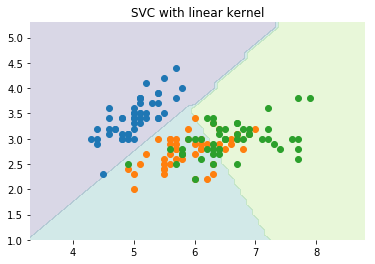

In [3]:
plt.title('SVC with linear kernel')
plot_decision_regions(X, y, clf=svc, legend=0)

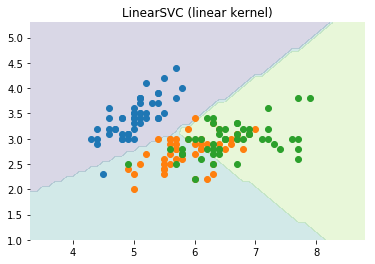

In [4]:
plt.title('LinearSVC (linear kernel)')
plot_decision_regions(X, y, clf=lin_svc, legend=0)

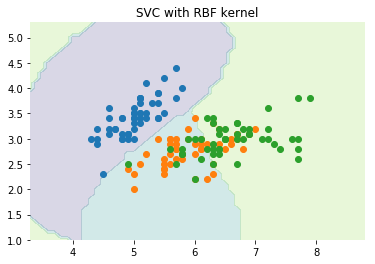

In [5]:
plt.title('SVC with RBF kernel')
plot_decision_regions(X, y, clf=rbf_svc, legend=0)

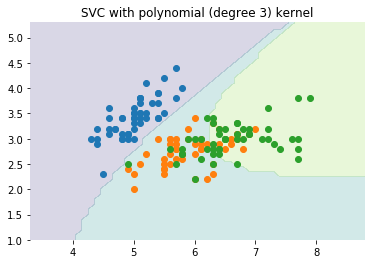

In [6]:
plt.title('SVC with polynomial (degree 3) kernel')
plot_decision_regions(X, y, clf=poly_svc, legend=0)

In [7]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

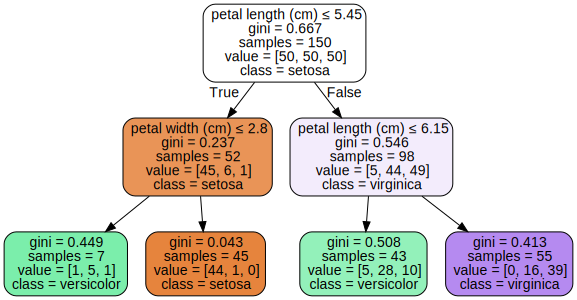

In [8]:
import os
from tempfile import mkstemp
import subprocess

from sklearn.tree.export import export_graphviz

def convert_decision_tree_to_ipython_image(clf, feature_names=None, class_names=None, tmp_dir=None):
    dot_filename = mkstemp(suffix='.dot', dir=tmp_dir)[1]
    with open(dot_filename, "w") as out_file:
        export_graphviz(clf, out_file=out_file,
                        feature_names=feature_names,
                        class_names=class_names,
                        filled=True, rounded=True,
                        special_characters=True)

    import graphviz
    from IPython.display import display

    with open(dot_filename) as f:
        dot_graph = f.read()
    display(graphviz.Source(dot_graph))
    os.remove(dot_filename)

convert_decision_tree_to_ipython_image(tree_clf, feature_names=iris.feature_names[2:], class_names=iris.target_names)

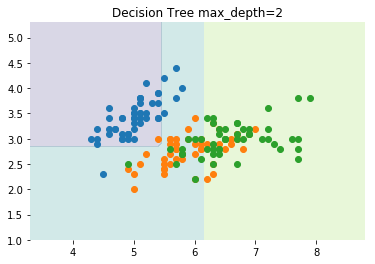

In [9]:
plt.title('Decision Tree max_depth=2')
plot_decision_regions(X, y, clf=tree_clf, legend=0)

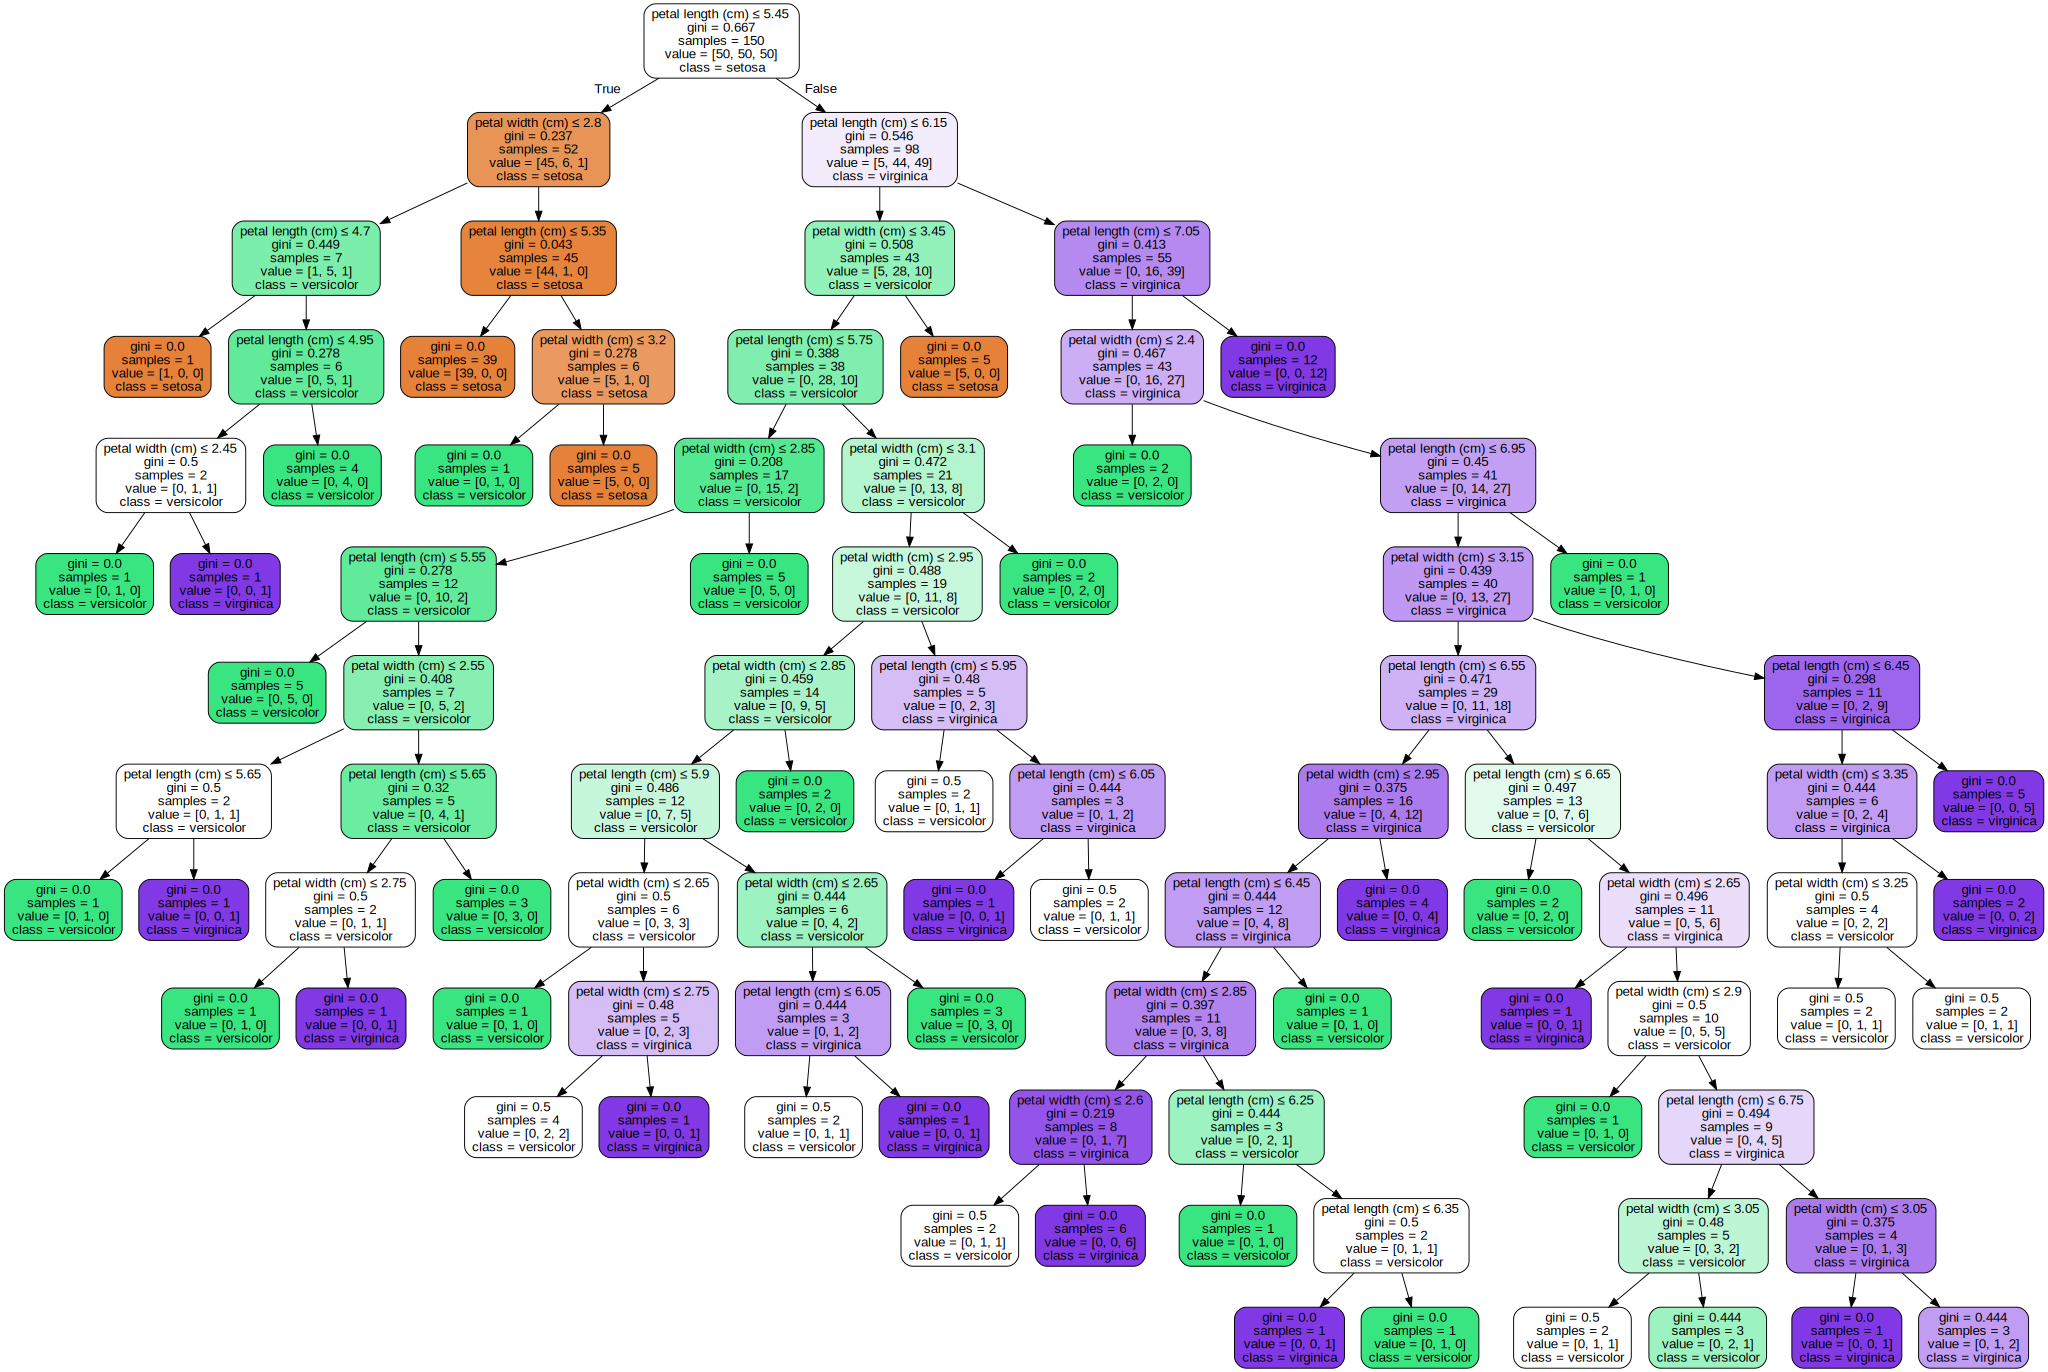

In [10]:
tree2_clf = DecisionTreeClassifier(random_state=42)
tree2_clf.fit(X, y)
convert_decision_tree_to_ipython_image(tree2_clf, feature_names=iris.feature_names[2:], class_names=iris.target_names)

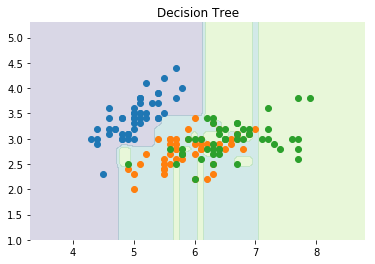

In [11]:
plt.title('Decision Tree')
plot_decision_regions(X, y, clf=tree2_clf, legend=0)

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

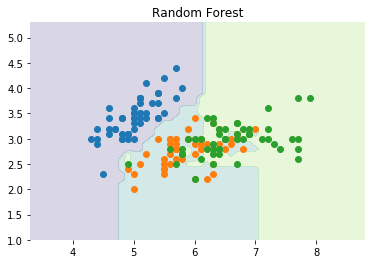

In [13]:
plt.title('Random Forest')
plot_decision_regions(X, y, clf=rf_clf, legend=0)